# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas. You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much). The columns comprise indices that is a summary of a different subset of Census variables and focuses on a different aspect of socio-economic advantage and disadvantage:
* Index of Relative Socio-economic Disadvantage (IRSD)
* Index of Relative Socio-economic Advantage and Disadvantage (IRSAD)
* Index of Education and Occupation (IEO)
* Index of Economic Resources (IER)

## Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings.

## Imports and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


## Distribution of Vouchers by LGA

Looking at the total value of the vouchers claimed by participant LGA, we can clearly observe an exponential trend when sorted in ascending order.

In [6]:
def grouped(column, method):
    temp = sa_vouchers_scores.groupby(column).agg(method).drop(['Participant_ID'], axis=1)
    return temp

In [7]:
sa_by_lga = grouped('Participant_LGA', 'sum').sort_values(by=['Voucher_Value'])
sa_by_lga.head()

,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
Participant_LGA,,,,,,,
COOBER PEDY,1950,78647,33930.0,33930.0,33891.0,33930.0,66066.0
PETERBOROUGH,2140,90721,39285.0,39285.0,36360.0,35910.0,77985.0
FLINDERS RANGES,4950,205612,98838.0,98838.0,96288.0,97410.0,173706.0
ORROROO/CARRIETON,5870,276193,138096.0,138096.0,134534.0,136041.0,119327.0
ELLISTON,7585,332606,161370.0,161370.0,161370.0,163515.0,172425.0


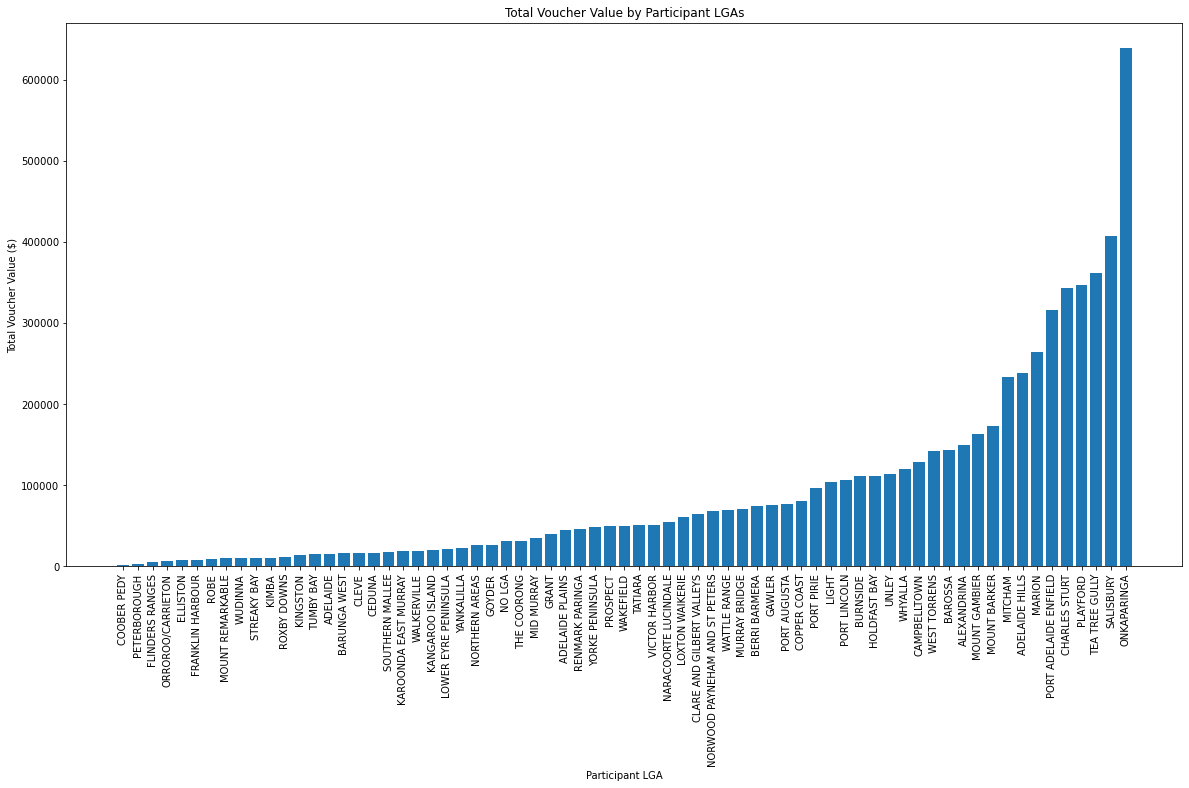

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(sa_by_lga.index, sa_by_lga['Voucher_Value'])
plt.title('Total Voucher Value by Participant LGAs')
plt.xlabel('Participant LGA')
plt.ylabel('Total Voucher Value ($)')
plt.xticks(rotation=90)
plt.show()

## Distribution of Vouchers by Sport

Looking at the total value of the vouchers claimed by eligible sports in the program, we can clearly observe an exponential trend when sorted in ascending order.

In [9]:
sa_by_sport = grouped('Voucher_Sport', 'sum').sort_values(by=['Voucher_Value'])
sa_by_sport.head()

,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
Voucher_Sport,,,,,,,
Bowls,100,4031,974.0,974.0,990.0,1000.0,83005.0
Kung Fu (Wu Shu),100,4030,1947.0,1947.0,1948.0,1967.0,208258.0
Dancesport,100,4031,1992.0,1992.0,1950.0,1986.0,319034.0
Shooting,140,8064,0.0,0.0,0.0,0.0,0.0
Paralympics,150,6045,3014.0,3014.0,3038.0,3057.0,226528.0


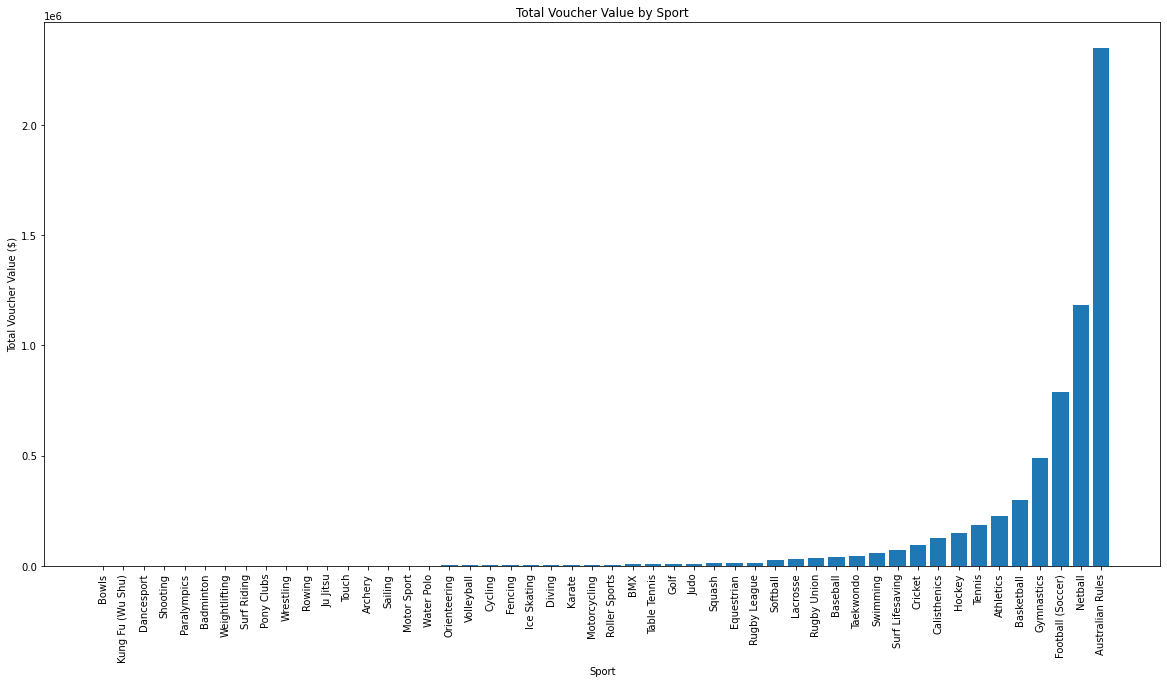

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(sa_by_sport.index, sa_by_sport['Voucher_Value'])
plt.title('Total Voucher Value by Sport')
plt.xlabel('Sport')
plt.ylabel('Total Voucher Value ($)')
plt.xticks(rotation=90)
plt.show()

## Popularity

From the heatmap below, we can see that across almost every participant LGA, the most popular sports in order are:
* Australian Rules
* Netball
* Football (Soccer)
* Gymnastics
* Hockey
* Basketball
* Athletics

However, some suburbs do stand out. For example, in the upper left region of the heatmap, swimming stands out as a popular sport in Flinders Range and Franklin Harbour.

The seven most popular sports above carry such a significant weighting that other sports become insignificant in the heatmap. So, we removed the most popular sports, to get a better picture of the remaining sports. We found that, although there are still favourites (including swimming, taekwondo, tennis, cricket, calisthenics), there is a much greater participation across the remaining sports.

### All sports

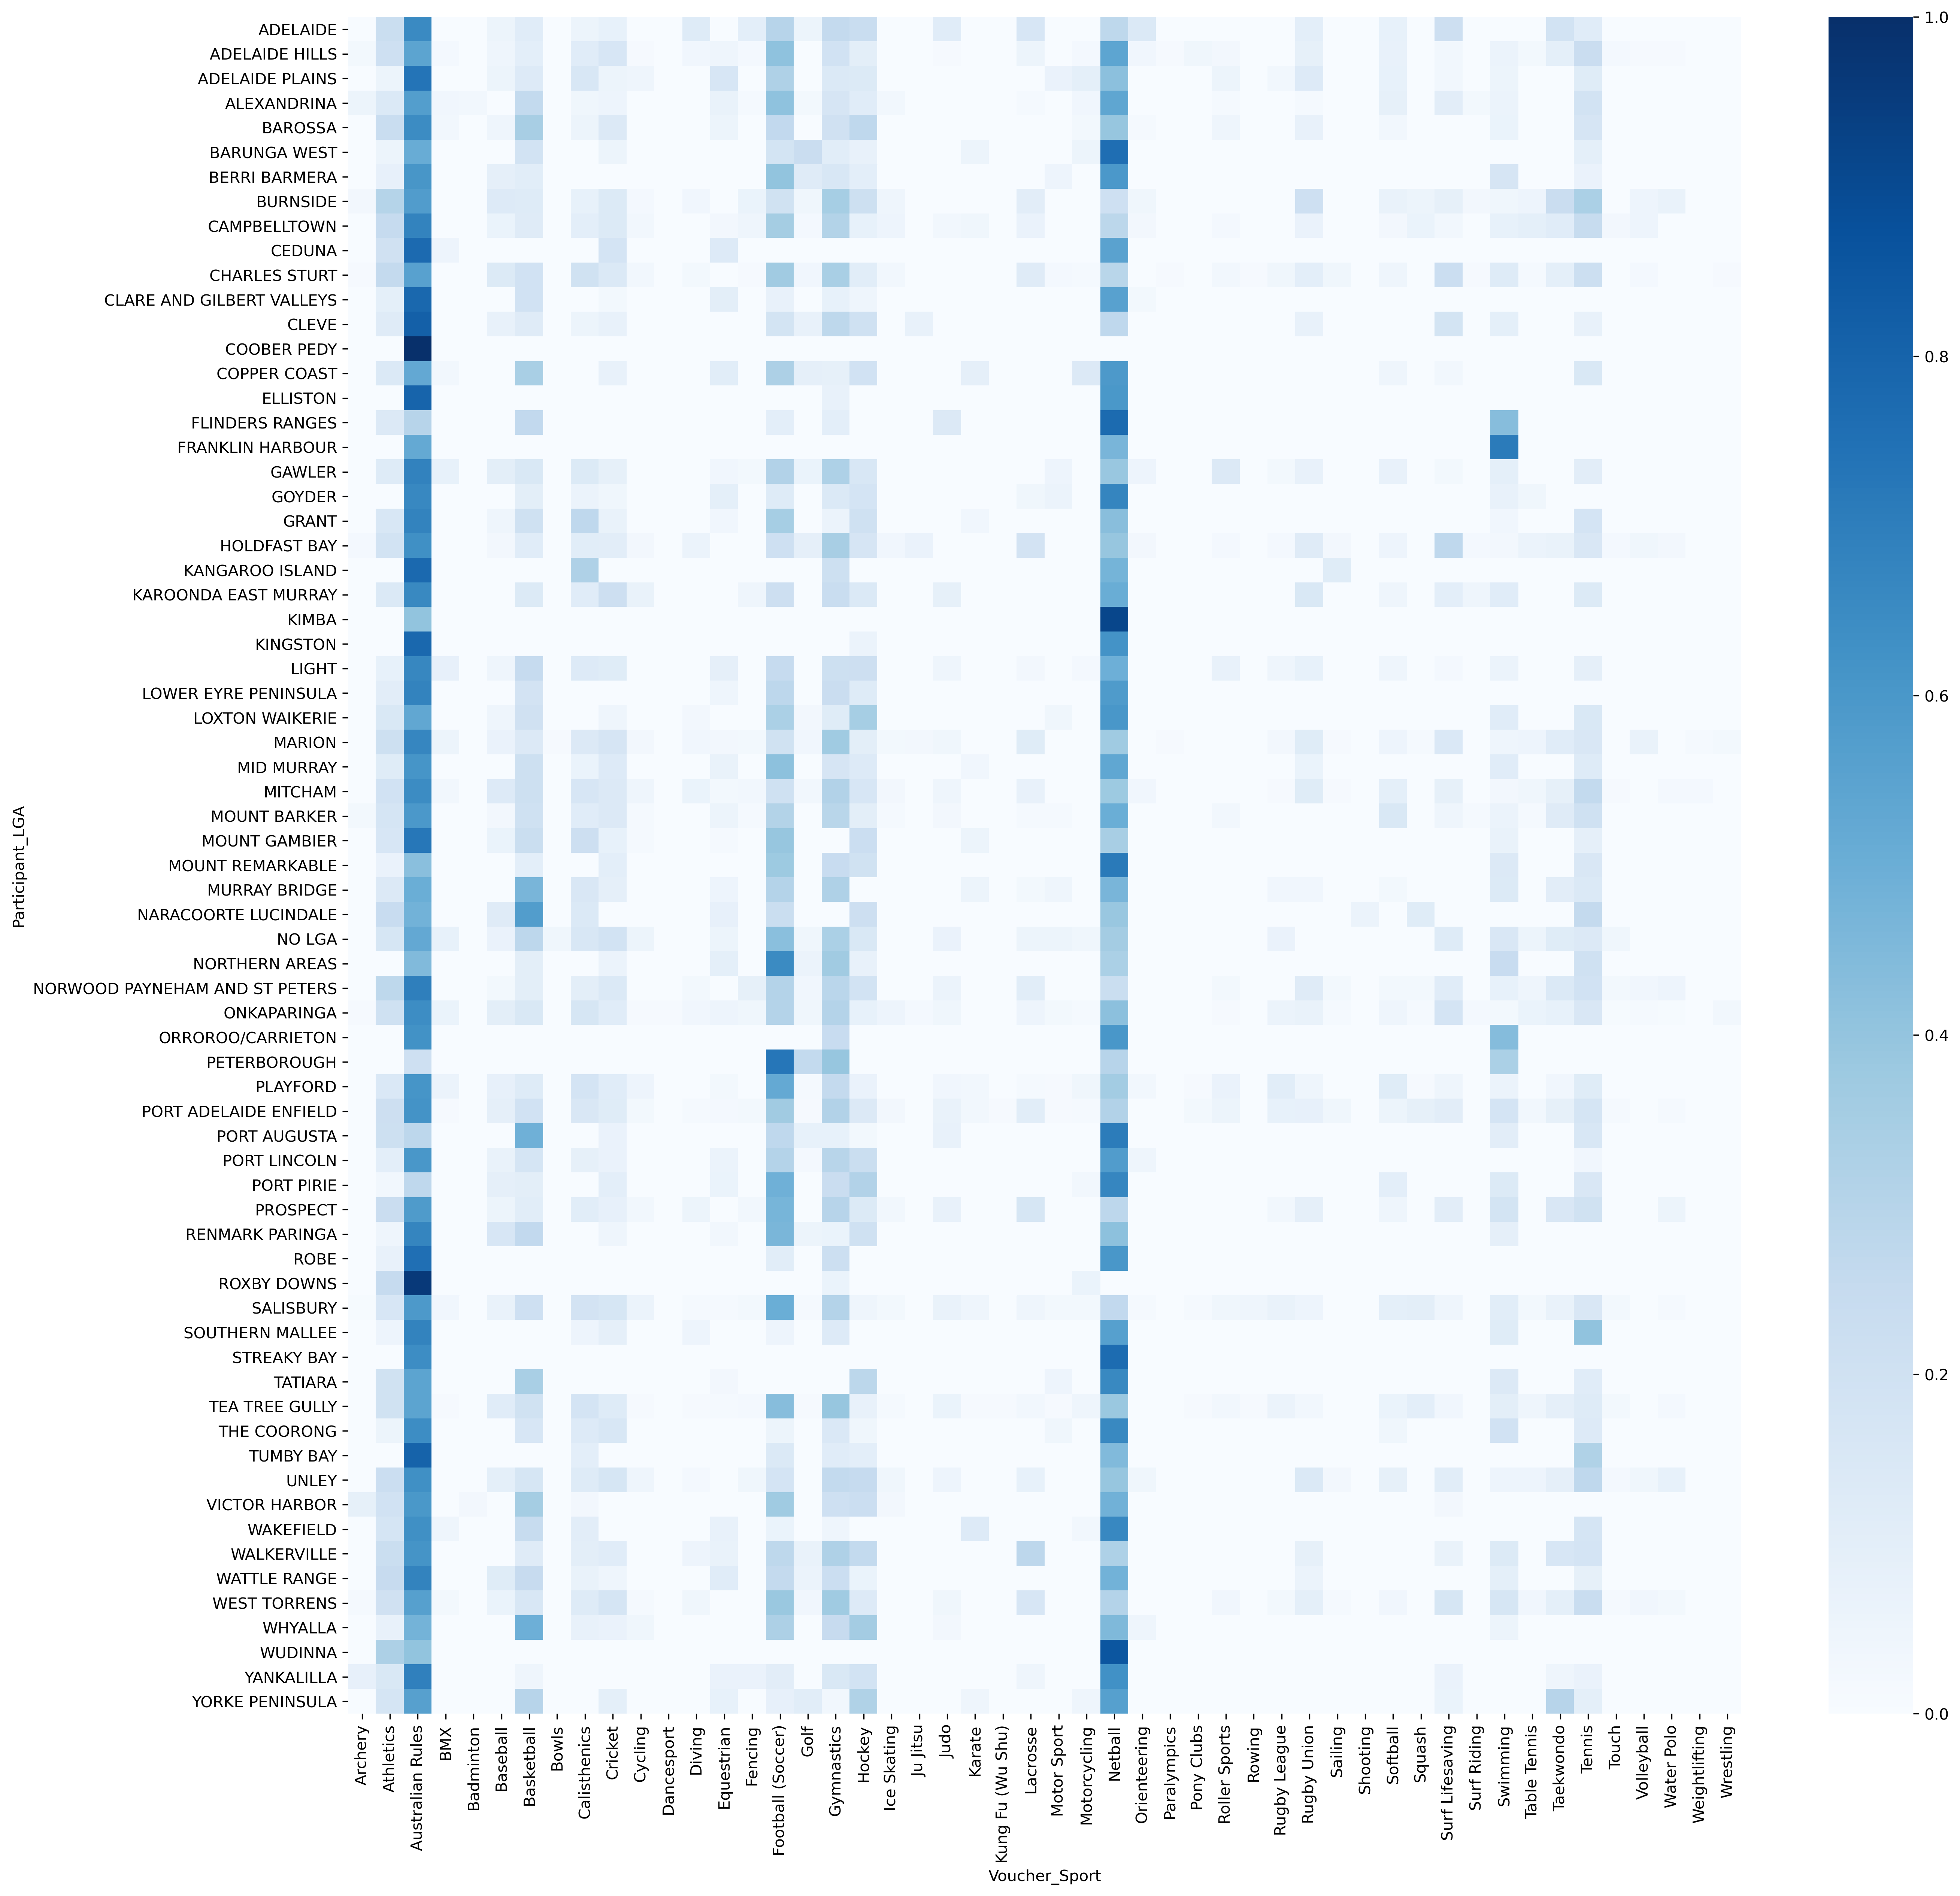

In [11]:
sa_lga_sport = pd.crosstab(sa_vouchers_scores['Participant_LGA'], sa_vouchers_scores['Voucher_Sport'], normalize='index')
sa_lga_sport = np.sqrt(sa_lga_sport)
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
ax = sns.heatmap(sa_lga_sport, cmap='Blues')
plt.show()

### Removing the popular sports

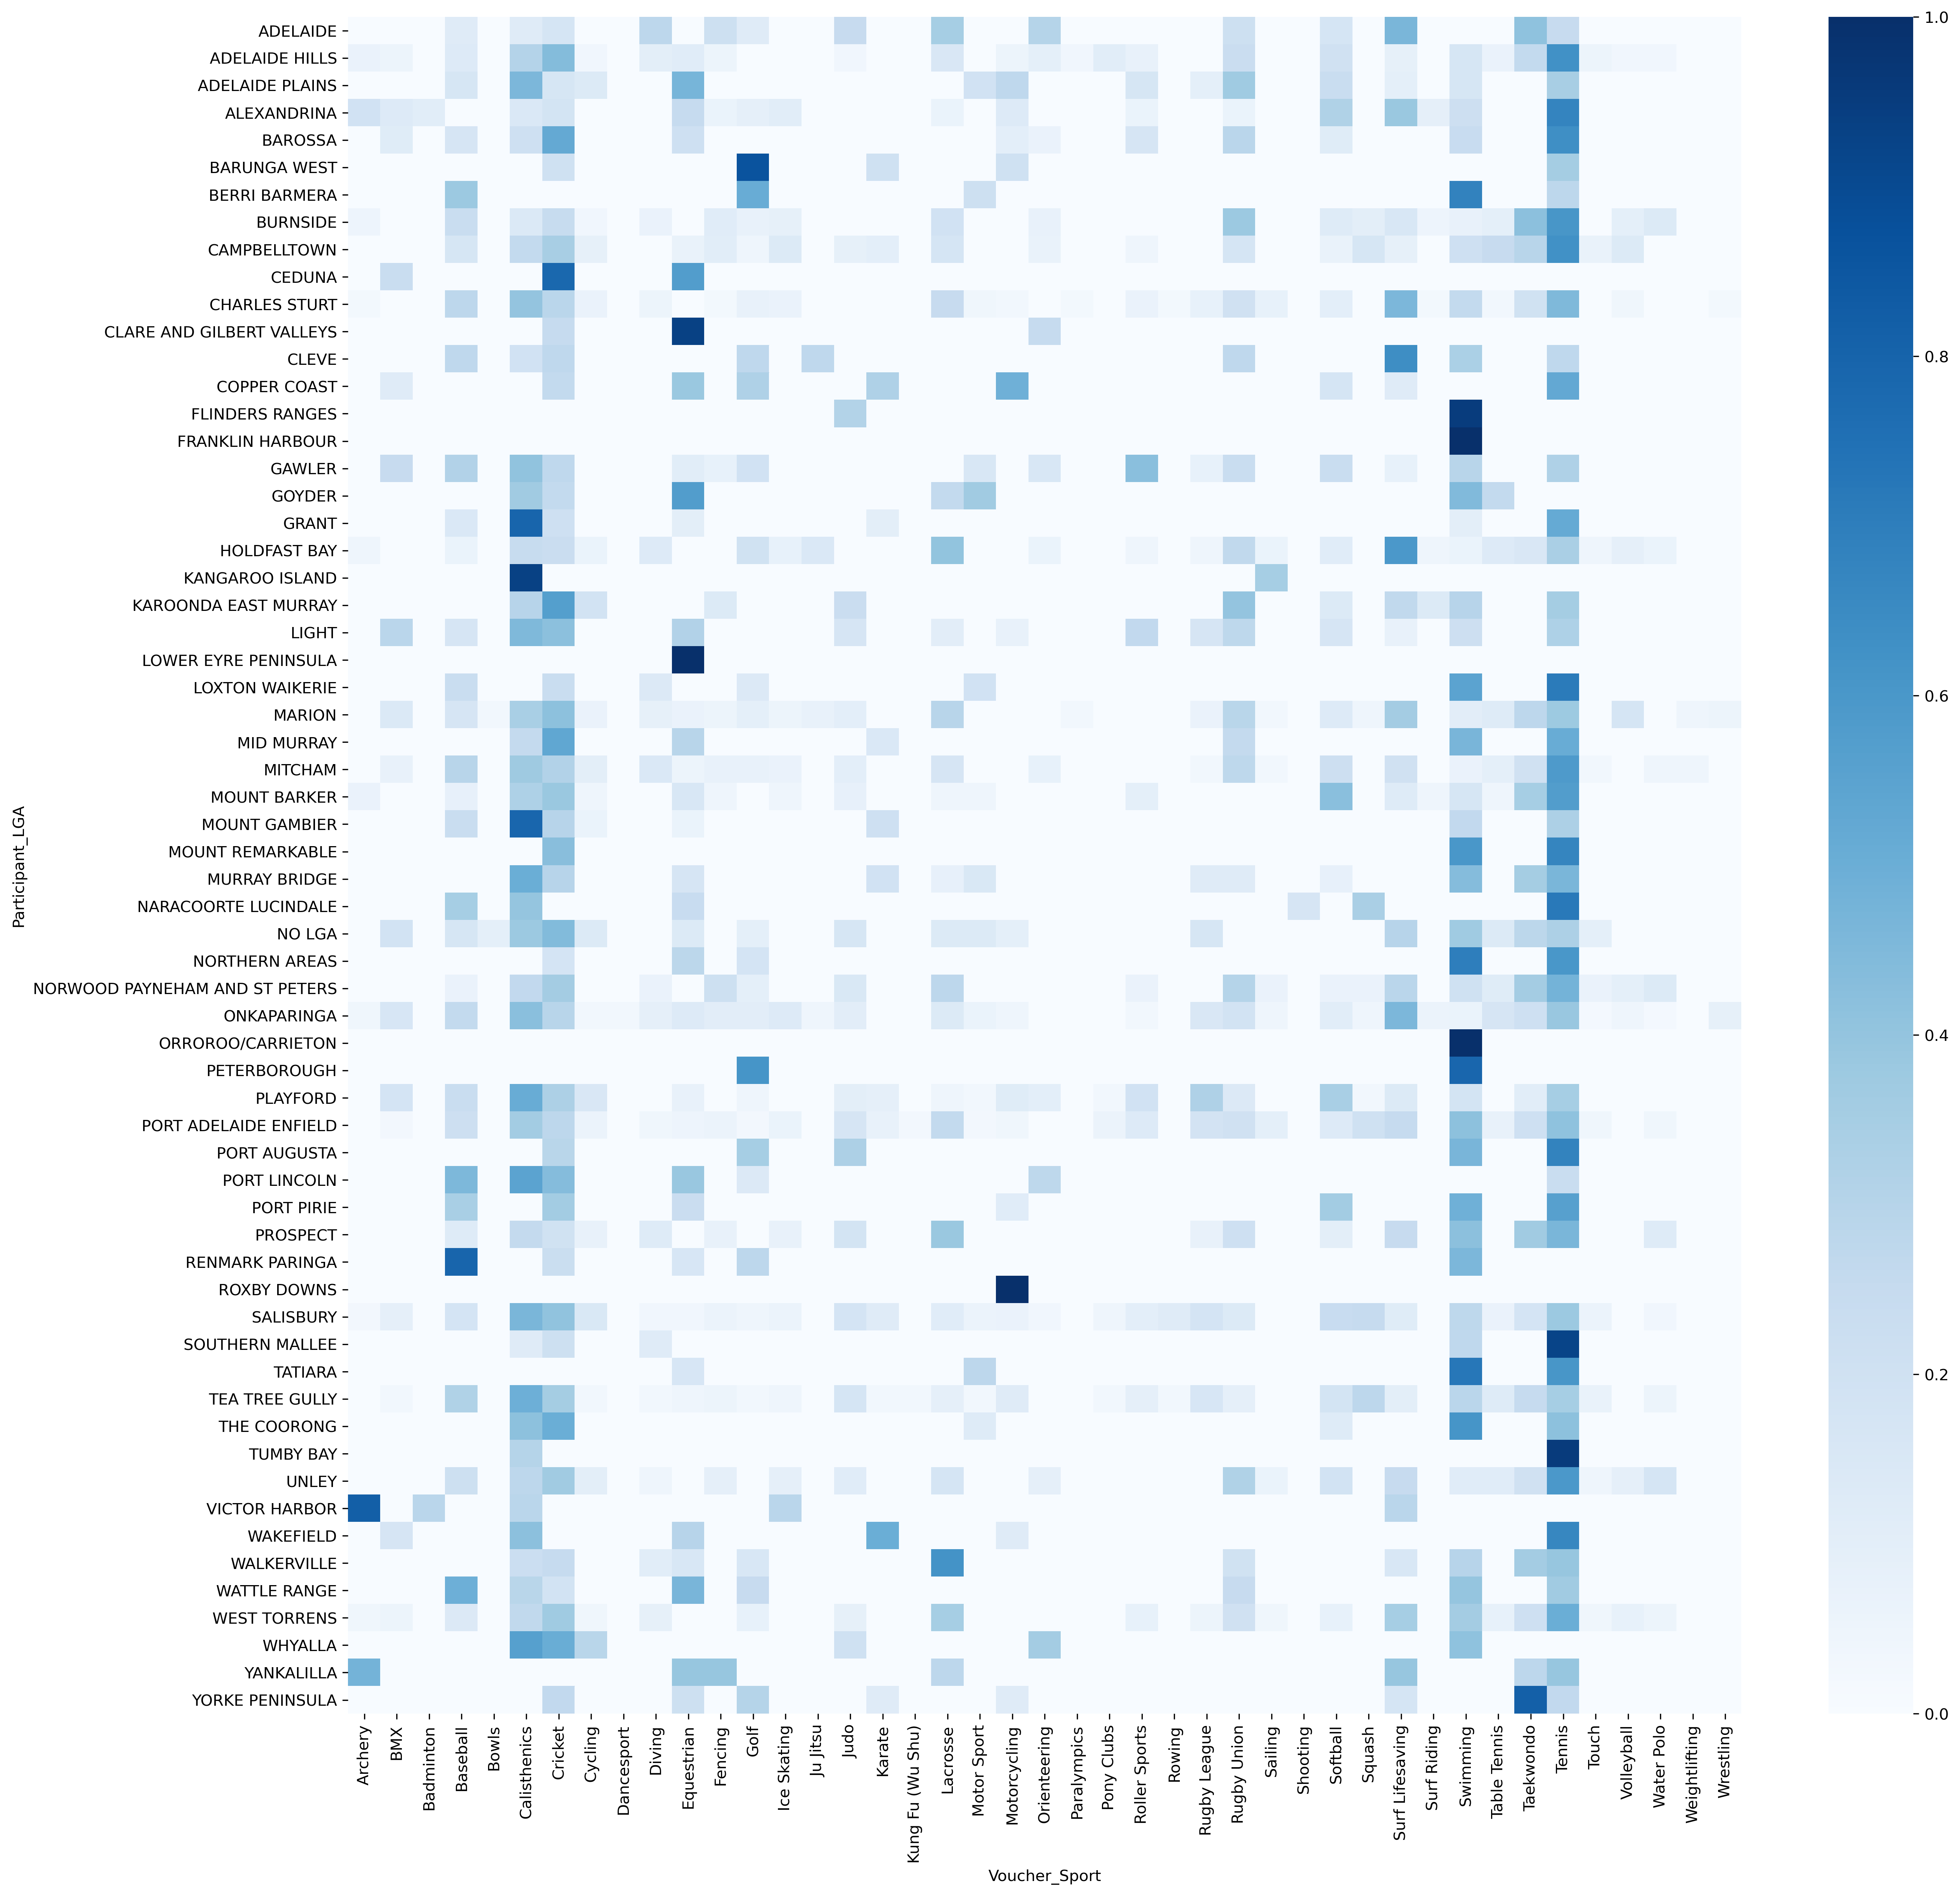

In [12]:
pop_sports = ['Athletics', 'Australian Rules', 'Basketball', 'Football (Soccer)', 'Gymnastics', 'Hockey', 'Netball']
without_pop_sports = sa_vouchers_scores[~sa_vouchers_scores['Voucher_Sport'].isin(pop_sports)]
sa_lga_sport_no_pop = pd.crosstab(without_pop_sports['Participant_LGA'], without_pop_sports['Voucher_Sport'], normalize='index')
sa_lga_sport_no_pop = np.sqrt(sa_lga_sport_no_pop)
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
ax = sns.heatmap(sa_lga_sport_no_pop, cmap='Blues')
plt.show()

## LGA Over/Under Representation

To determine whether an LGA is over or under represented, we analysed the total voucher value per capita by participant LGA sorted by their IEO measure.

We conclude that:
* The three lowest LGAs in terms of IEO (Coober Pedy, Peterborough, Adelaide), is under represented in their voucher use.
* Kingston stands out as an LGA with a relatively high IEO measure that remains under represented.
* Karoonda East Murray is the only one clearly over represented with the highest voucher use per capita of \\$18.21
* Besides these particulare LGAs, the remaining LGAs with an IEO score are all reasonably represented.

In [13]:
sa_per_capita = grouped('Participant_LGA', 'sum')[['Voucher_Value']].join(grouped('Participant_LGA', 'mean').drop(['Voucher_Value'], axis=1))
sa_per_capita['voucher_value_per_capita'] = sa_per_capita['Voucher_Value'] / sa_per_capita['Population']
sa_per_capita = sa_per_capita.sort_values(by=['IEO'])
sa_per_capita.head()

,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population,voucher_value_per_capita
Participant_LGA,,,,,,,,
COOBER PEDY,1950,2016.589744,870.0,870.0,869.0,870.0,1694.0,1.151122
PETERBOROUGH,2140,2016.022222,873.0,873.0,808.0,798.0,1733.0,1.234853
ADELAIDE,15100,2015.894040,874.0,874.0,1036.0,1013.0,19606.0,0.770172
WHYALLA,120347,2015.930064,905.0,905.0,897.0,905.0,22070.0,5.452968
PLAYFORD,346435,2015.991643,914.0,914.0,868.0,871.0,79082.0,4.380706


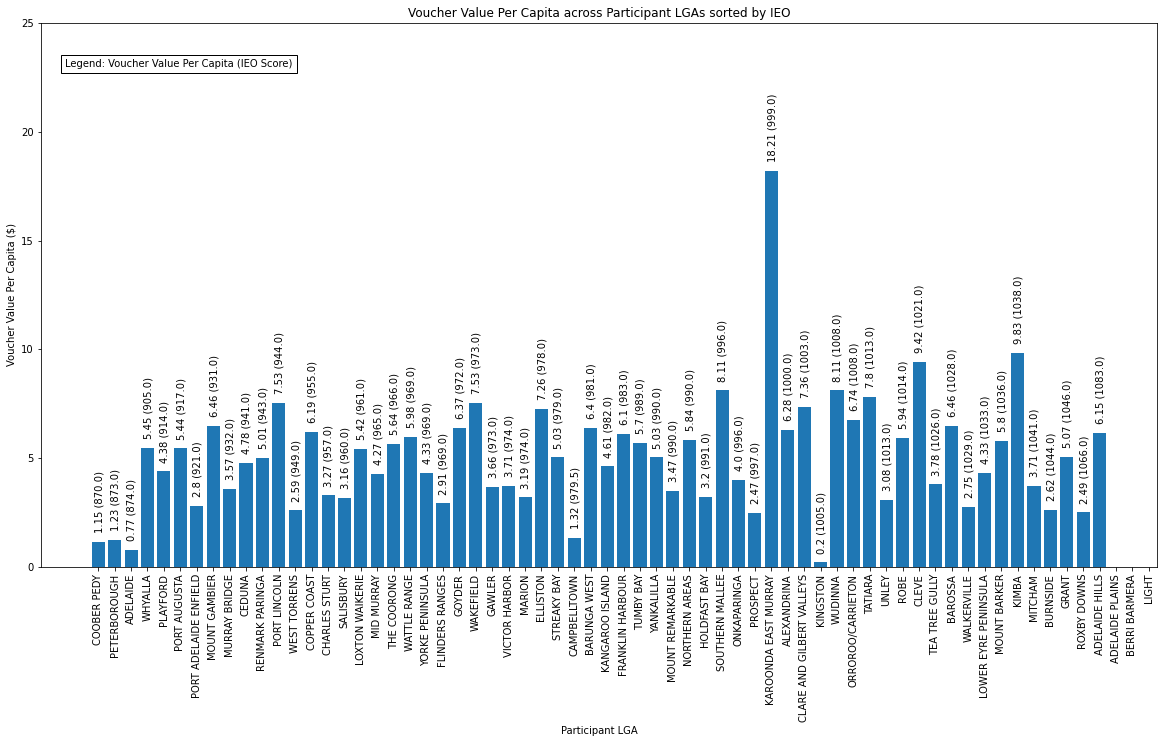

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(sa_per_capita.index, sa_per_capita['voucher_value_per_capita'])
plt.xlabel('Participant LGA')
plt.ylabel('Voucher Value Per Capita ($)')
plt.title('Voucher Value Per Capita across Participant LGAs sorted by IEO')
plt.xticks(rotation=90)
plt.ylim(top=25)

ax.text(-2, 23, 'Legend: Voucher Value Per Capita (IEO Score)', bbox=dict(facecolor='none'))
for i, v in enumerate(sa_per_capita['voucher_value_per_capita']):
    if str(v) != 'nan':
        ax.text(-0.25+i, v+0.5, f"{round(v, 2)} ({sa_per_capita['IEO'][i]})", rotation=90)

plt.show()

## Voucher Use vs SEIFA Measures

Since the SEIFA measures are a measure across an LGA, I summed the voucher value of each participant LGA and plotted that against the four socio-economic indicators: IEO, IER, IRSAD, IRSD.

Across each indicator, the plots look relatively similar. However, there is no clear linear relationship between SEIFA measures and voucher use.

In [15]:
voucher_val = grouped('Participant_LGA', 'sum')[['Voucher_Value']]
voucher_val.head()

,Voucher_Value
Participant_LGA,
ADELAIDE,15100
ADELAIDE HILLS,237570
ADELAIDE PLAINS,44841
ALEXANDRINA,148790
BAROSSA,143335


In [16]:
scores = grouped('Participant_LGA', 'mean')[['IEO', 'IER', 'IRSAD', 'IRSD']]
scores.head()

,IEO,IER,IRSAD,IRSD
Participant_LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ADELAIDE PLAINS,NaN,NaN,NaN,NaN
ALEXANDRINA,1000.0,1000.0,969.0,987.0
BAROSSA,1028.0,1028.0,997.0,1017.0


In [17]:
joined = voucher_val.join(scores)
joined.head()

,Voucher_Value,IEO,IER,IRSAD,IRSD
Participant_LGA,,,,,
ADELAIDE,15100,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,237570,1083.0,1083.0,1077.0,1081.0
ADELAIDE PLAINS,44841,NaN,NaN,NaN,NaN
ALEXANDRINA,148790,1000.0,1000.0,969.0,987.0
BAROSSA,143335,1028.0,1028.0,997.0,1017.0


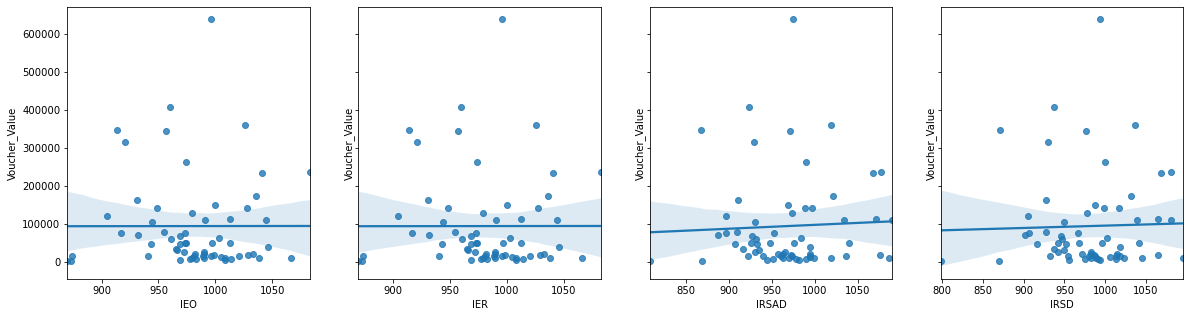

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5), sharey=True)
sns.regplot(x='IEO', y='Voucher_Value', data=joined, ax=ax1)
sns.regplot(x='IER', y='Voucher_Value', data=joined, ax=ax2)
sns.regplot(x='IRSAD', y='Voucher_Value', data=joined, ax=ax3)
sns.regplot(x='IRSD', y='Voucher_Value', data=joined, ax=ax4)
plt.show()

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [19]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head(3)

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00


In [20]:
# Join the QLD data with the LGA data as before to get population and SEIFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head(3)

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


## Analysis

Before doing any analysis, we need to unify the sport names between the South Australia and Queensland dataset. First, we found the overlapping sport names. With the remaining sport names, we compared their likeness using `SequenceMatcher` with a 70% similarity threshold to rename the Queensland sport names to match their South Australia counterparts.

In [35]:
qld_sports = set(qld_vouchers_scores['Participation Activity'])
sa_sports = set(sa_vouchers_scores['Voucher_Sport'])
overlap = sa_sports.intersection(qld_sports)

from difflib import SequenceMatcher
checks = []
for q in qld_sports-overlap:
    for s in sa_sports-overlap:
        similarity = SequenceMatcher(a=q.split()[0], b=s.split()[0]).ratio()
        if similarity >= 0.7:
            checks.append((q, s))

display(checks)
del checks[2]
display(checks)

new_qld = qld_vouchers_scores.copy(deep=True)
for i in range(len(checks)):
    new_qld.loc[qld_vouchers_scores['Participation Activity'] == checks[i][0], checks[i][0]] = checks[i][1]
new_qld.head()

[('Pony Club', 'Pony Clubs'),
 ('Surfing', 'Surf Lifesaving'),
 ('Surfing', 'Surf Riding'),
 ('Motor Cycling', 'Motor Sport'),
 ('BMX Bicycle Motocross', 'BMX'),
 ('Bowls Lawn', 'Bowls'),
 ('Australian Football', 'Australian Rules')]

[('Pony Club', 'Pony Clubs'),
 ('Surfing', 'Surf Lifesaving'),
 ('Motor Cycling', 'Motor Sport'),
 ('BMX Bicycle Motocross', 'BMX'),
 ('Bowls Lawn', 'Bowls'),
 ('Australian Football', 'Australian Rules')]

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,...,IER,IRSAD,IRSD,Population,Pony Club,Surfing,Motor Cycling,BMX Bicycle Motocross,Bowls Lawn,Australian Football
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,...,989.0,966.0,982.0,31393.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,...,1018.0,1057.0,1048.0,1042074.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,...,1018.0,1057.0,1048.0,1042074.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,...,1018.0,1057.0,1048.0,1042074.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,...,1018.0,1057.0,1048.0,1042074.0,NaN,NaN,NaN,NaN,NaN,NaN


### Popularity

After renaming the sport names to best match the values used in the SA dataset, we can clearly see a preference towards:
* Rugby League
* Football (Soccer)
* Netball
* Gymnastics
* Hockey

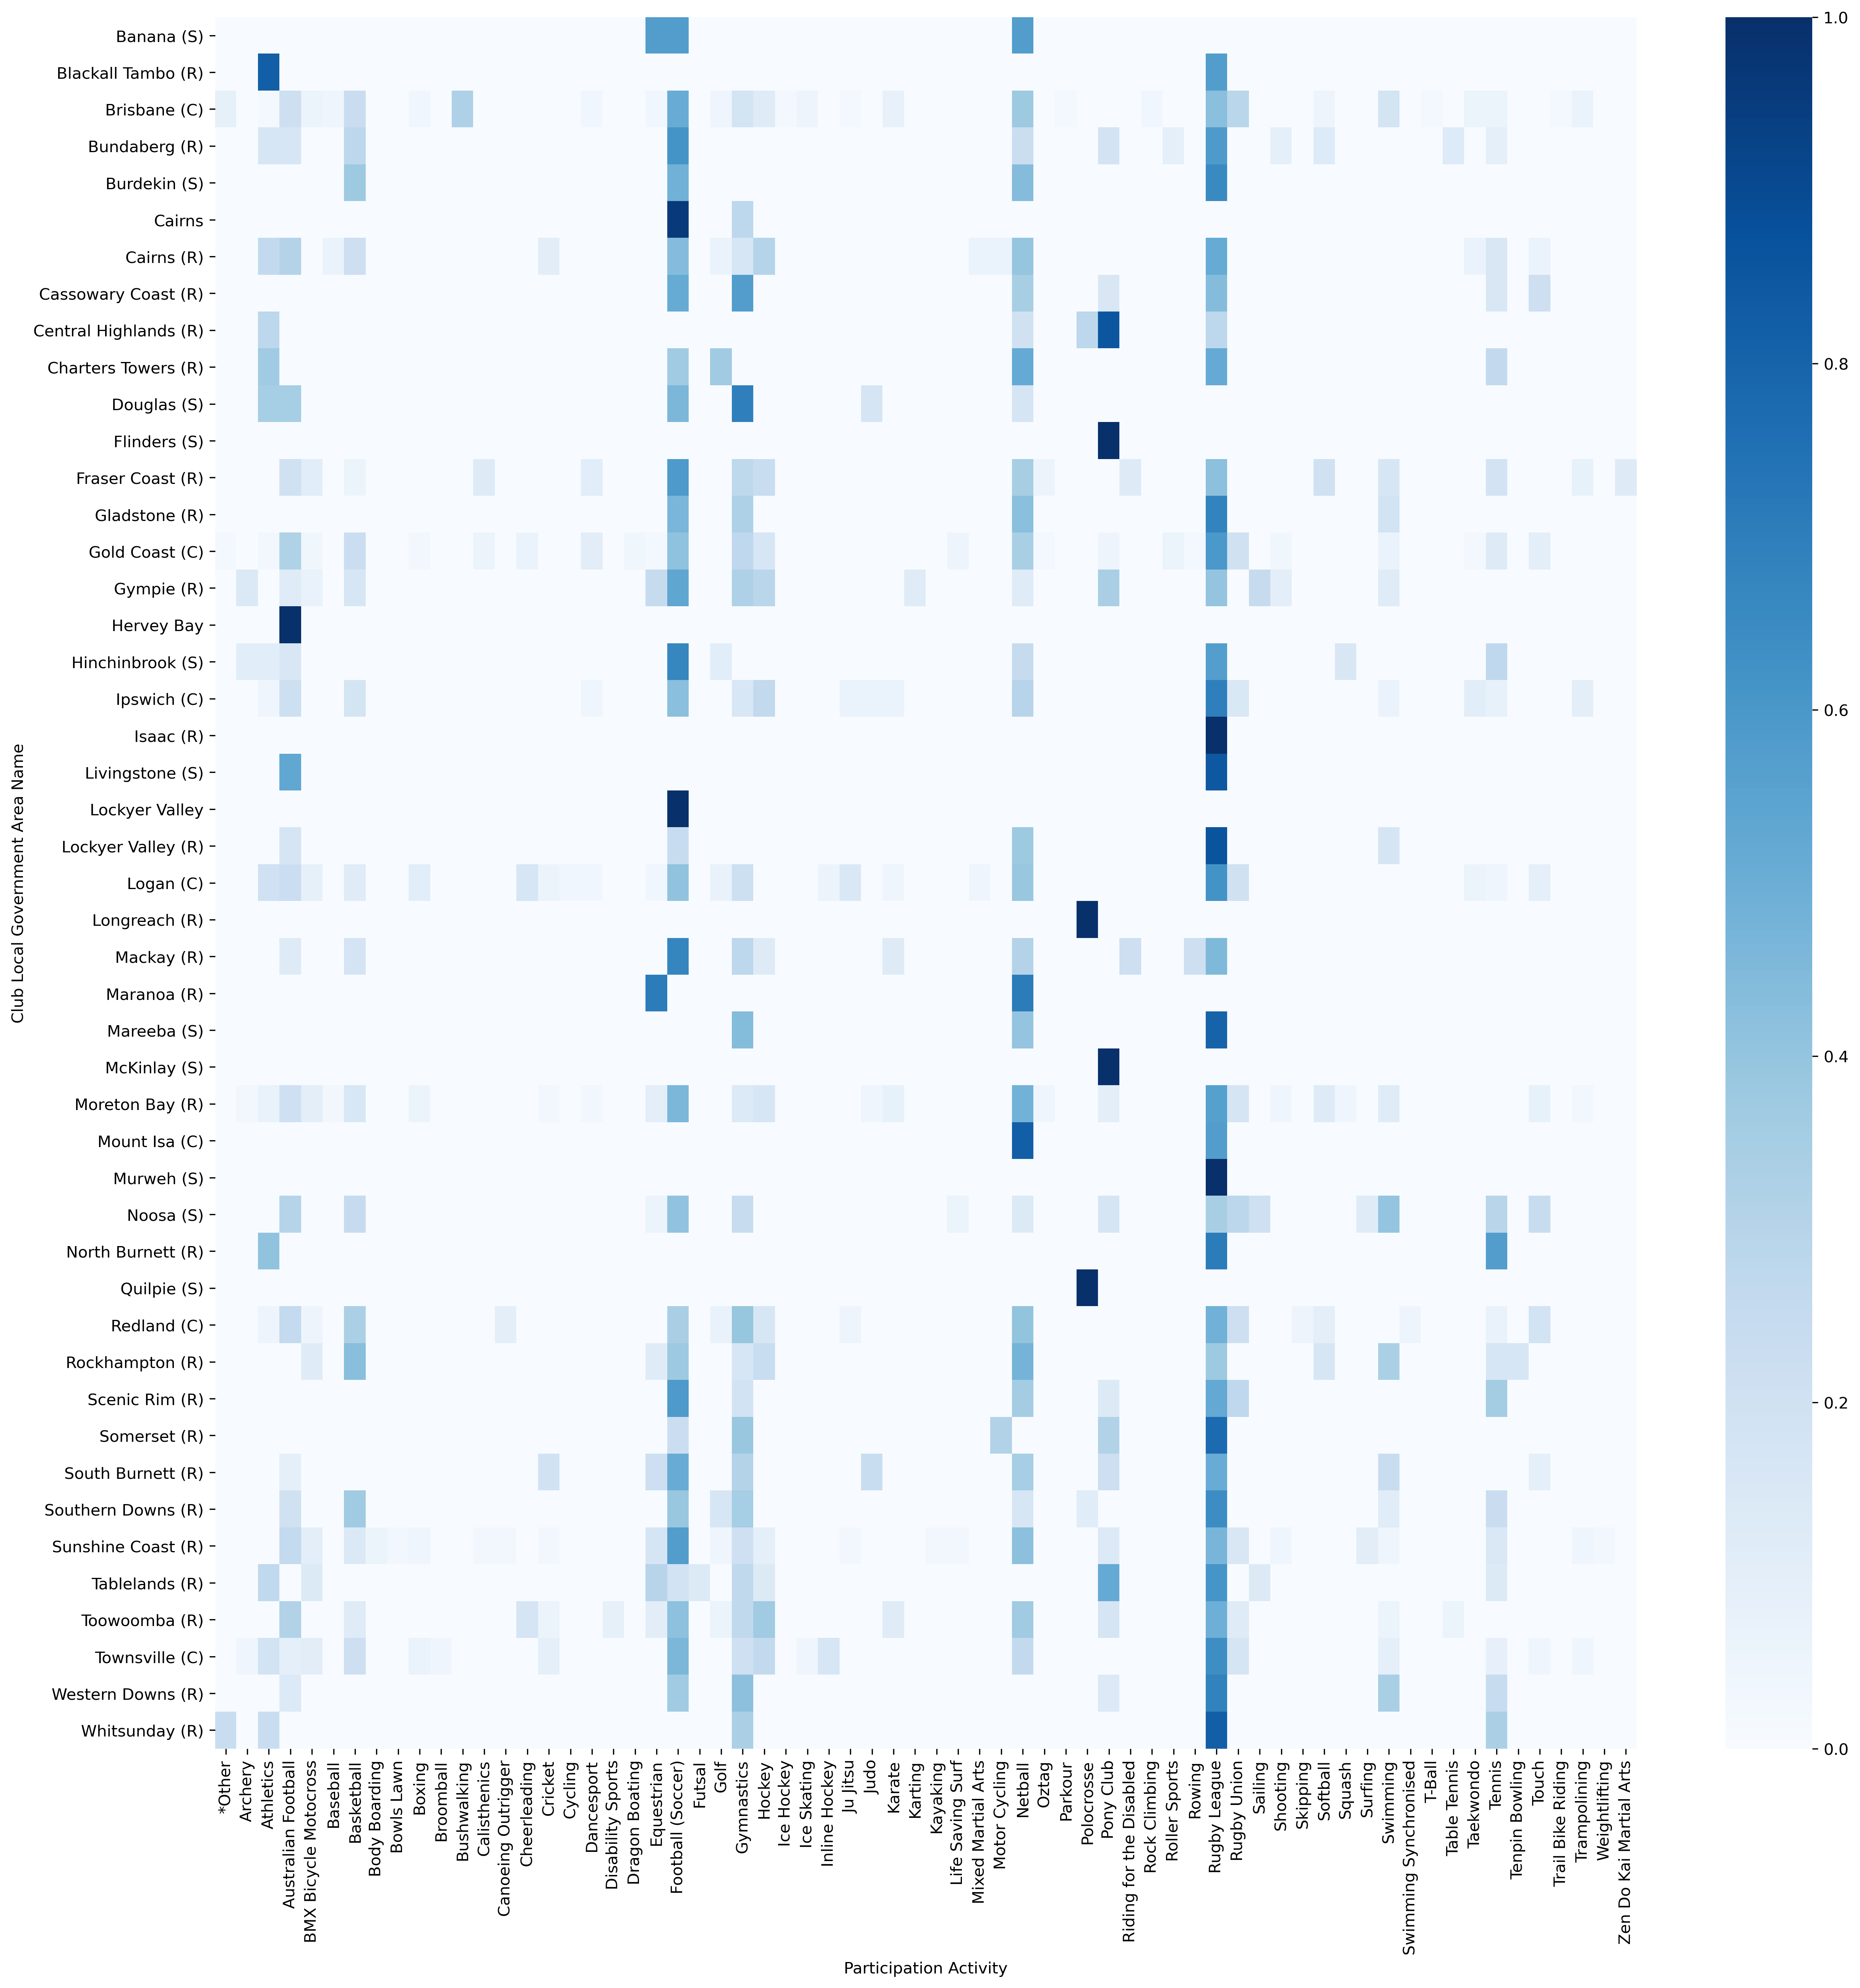

In [22]:
qld_lga_sport = pd.crosstab(new_qld['Club Local Government Area Name'], new_qld['Participation Activity'], normalize='index')
qld_lga_sport = np.sqrt(qld_lga_sport)
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
ax = sns.heatmap(qld_lga_sport, cmap='Blues')
plt.show()

### LGA Over/Under Representation

Looking by LGA, we notice that some of the lower socie-economic LGAs used significantly more than the average \\$0.21 per capita. However, others in that region remain under represented. Across the IEO measure spectrum, there is no clear relationship between IEO and voucher use per capita.

In [23]:
payment = new_qld.groupby('Club Local Government Area Name').agg('sum')[['Total Payment']]
indices = new_qld.groupby('Club Local Government Area Name').agg('mean').drop(['Total Payment', 'Application Number', 'Gender'], axis=1)
qld_per_capita = payment.join(indices)
qld_per_capita['payment_per_capita'] = qld_per_capita['Total Payment'] / qld_per_capita['Population']
qld_per_capita = qld_per_capita.sort_values(by=['IEO'])
display(qld_per_capita.head())

avg = round(qld_per_capita['payment_per_capita'].mean(), 2)
print(f"Total payment per capita average: {avg}")

,Total Payment,Child Age (at time of Application),IEO,IER,IRSAD,IRSD,Population,payment_per_capita
Club Local Government Area Name,,,,,,,,
Fraser Coast (R),43241.0,10.065625,947.0,947.0,908.0,917.0,95348.0,0.453507
Bundaberg (R),15902.0,11.250000,954.0,954.0,917.0,930.0,89786.0,0.177110
Tablelands (R),6030.0,9.321429,956.0,956.0,932.0,945.0,43762.0,0.137791
Cassowary Coast (R),5162.0,9.428571,957.0,957.0,926.0,944.0,27676.0,0.186515
North Burnett (R),900.0,9.333333,958.0,958.0,917.0,928.0,10128.0,0.088863


Total payment per capita average: 0.21


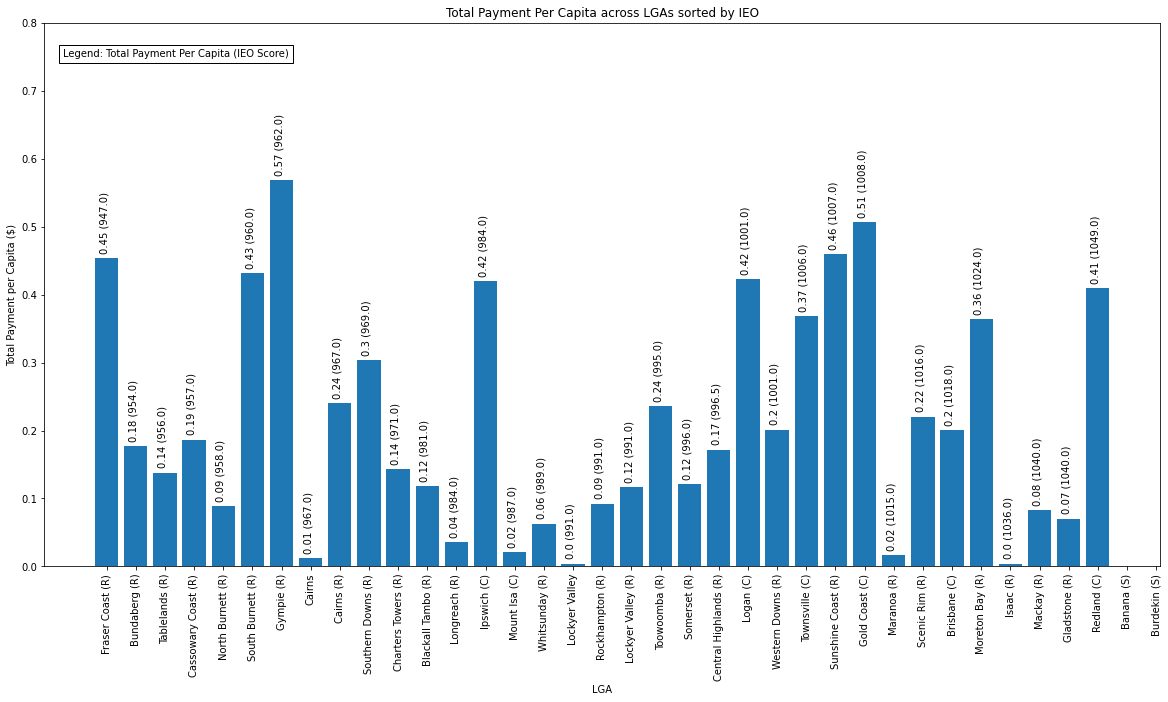

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(qld_per_capita.index, qld_per_capita['payment_per_capita'])
plt.xlabel('LGA')
plt.ylabel('Total Payment per Capita ($)')
plt.title('Total Payment Per Capita across LGAs sorted by IEO')
plt.xticks(rotation=90)
plt.ylim(top=0.8)

ax.text(-1.5, 0.75, 'Legend: Total Payment Per Capita (IEO Score)', bbox=dict(facecolor='none'))
for i, v in enumerate(qld_per_capita['payment_per_capita']):
    if str(v) != 'nan':
        ax.text(-0.25+i, v+0.01, f"{round(v, 2)} ({qld_per_capita['IEO'][i]})", rotation=90)

plt.show()

## Comparing SA and QLD

To compare SA and QLD voucher use, only the overlapping sports under the two systems were considered. The total voucher values were square rooted to allow a better visualisation given the large differences. Across each sport, the average SA and QLD values were calculated and used to sort the sports so the total voucher values could be visualised in a meaningful way.

Key observations:

* In SA, the three most popular sports were: netball, football (soccer), gymnastics
* In QLD, the three most popular sports were: rugby league, football (soccer), netball
* SA people claimed more than their QLD counterparts in every sport except: shooting, dancesport, ju jitsu, sailing, touch, rugby union, rugby league

In [90]:
sa_voucher_value = sa_vouchers_scores.groupby('Voucher_Sport').agg('sum')[['Voucher_Value']]
sa_voucher_value = sa_voucher_value[sa_voucher_value.index.isin(overlap)]
qld_voucher_value = qld_vouchers_scores.groupby('Participation Activity').agg('sum')[['Total Payment']]
qld_voucher_value = qld_voucher_value[qld_voucher_value.index.isin(overlap)]
sa_qld = sa_voucher_value.join(qld_voucher_value)
sa_qld = sa_qld.reset_index()
sa_qld = sa_qld.rename(columns={'Voucher_Sport':'Sport', 'Voucher_Value':'SA', 'Total Payment':'QLD'})
sa_qld.SA = np.sqrt(sa_qld.SA)
sa_qld.QLD = np.sqrt(sa_qld.QLD)
sa_qld['Average'] = round((sa_qld['SA'] + sa_qld['QLD']) / 2, 2)
sa_qld = sa_qld.sort_values(by='Average').reset_index(drop=True)
sa_qld.head()

,Sport,SA,QLD,Average
0,Weightlifting,14.142136,12.247449,13.19
1,Shooting,11.832160,36.193922,24.01
2,Rowing,33.166248,22.693611,27.93
3,Archery,41.231056,29.257478,35.24
4,Dancesport,10.000000,63.718129,36.86


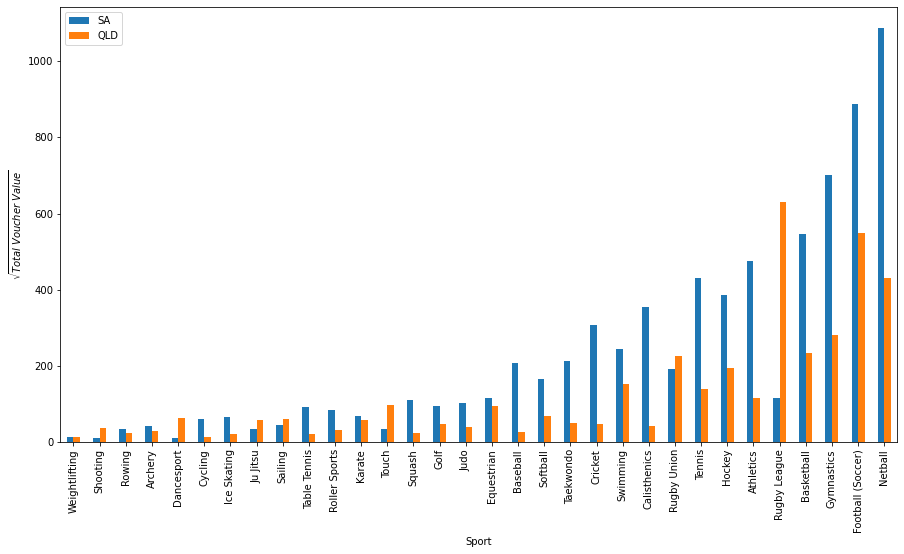

In [91]:
sa_qld.plot(x='Sport', y=['SA', 'QLD'], kind='bar', figsize=(15,8))
plt.ylabel(r'$\sqrt{Total \; Voucher \; Value}$')
plt.show()

In [96]:
sa_qld[sa_qld.SA < sa_qld.QLD]

,Sport,SA,QLD,Average
1,Shooting,11.832160,36.193922,24.01
4,Dancesport,10.000000,63.718129,36.86
7,Ju Jitsu,33.166248,56.903427,45.03
8,Sailing,44.721360,61.237244,52.98
12,Touch,33.911650,96.213305,65.06
23,Rugby Union,191.572441,225.211012,208.39
27,Rugby League,116.189500,631.359644,373.77
